In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# from pandas_profiling import ProfileReport


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
train = pd.read_csv('kaggle/input/covid19-global-forecasting-week-1/train.csv')
test = pd.read_csv('kaggle/input/covid19-global-forecasting-week-1/test.csv')
submission = pd.read_csv('kaggle/input/covid19-global-forecasting-week-1/submission.csv')

In [3]:
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [4]:
test.head()

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0,65.0,2020-03-12
1,2,NaN,Afghanistan,33.0,65.0,2020-03-13
2,3,NaN,Afghanistan,33.0,65.0,2020-03-14
3,4,NaN,Afghanistan,33.0,65.0,2020-03-15
4,5,NaN,Afghanistan,33.0,65.0,2020-03-16


In [5]:
test.count()

ForecastId        12212
Province/State     5590
Country/Region    12212
Lat               12169
Long              12169
Date              12212
dtype: int64

In [6]:
submission.count()

ForecastId        12212
ConfirmedCases    12212
Fatalities        12212
dtype: int64

In [7]:
# train_profile = ProfileReport(train, title='Pandas Profiling Report', html={'style':{'full_width':True}})
# train_profile

In [8]:
# test_profile = ProfileReport(test, title='Pandas Profiling Report', html={'style':{'full_width':True}})
# test_profile

In [9]:
train['Country/Region'].nunique(), test['Country/Region'].nunique()

(163, 163)

In [10]:
set(train['Country/Region']) - set(test['Country/Region'])

set()

In [11]:
 test['Date'].unique(),  test['Date'].nunique()

(array(['2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
        '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
        '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
        '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
        '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
        '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
        '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
        '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
        '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
        '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
        '2020-04-21', '2020-04-22', '2020-04-23'], dtype=object), 43)

## Just take a look in China familiar with the trend of Data 

In [12]:
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
train[train['Country/Region']=='China'].head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
2773,4372,Anhui,China,31.8257,117.2264,2020-01-22,1.0,0.0
2774,4373,Anhui,China,31.8257,117.2264,2020-01-23,9.0,0.0
2775,4374,Anhui,China,31.8257,117.2264,2020-01-24,15.0,0.0
2776,4375,Anhui,China,31.8257,117.2264,2020-01-25,39.0,0.0
2777,4376,Anhui,China,31.8257,117.2264,2020-01-26,60.0,0.0


In [14]:
train_timeseries_Confirmed = train[train['Country/Region']=='China'].groupby('Date')['ConfirmedCases'].sum()
train_timeseries_Fatalities = train[train['Country/Region']=='China'].groupby('Date')['Fatalities'].sum()

In [15]:
sns.set(rc={'figure.figsize':(11, 4)})
train_timeseries_Confirmed.plot(linewidth=0.5,label='Confirmed')
train_timeseries_Fatalities.plot(linewidth=0.5,label='Fatalities')
plt.legend()

### Normalization

In [16]:
train_timeseries_Confirmed_norm = (train_timeseries_Confirmed-train_timeseries_Confirmed.mean())/train_timeseries_Confirmed.std()
train_timeseries_Fatalities_norm = (train_timeseries_Fatalities-train_timeseries_Fatalities.mean())/train_timeseries_Fatalities.std()

In [17]:
sns.set(rc={'figure.figsize':(11, 4)})
train_timeseries_Confirmed_norm.plot(linewidth=0.5,label='Confirmed')
train_timeseries_Fatalities_norm.plot(linewidth=0.5,label='Fatalities')
plt.legend()

## Training Directly from original data using sklearn

1. Linear Regression
2. SVM classification
3. SVM Regression
4. Random forest

In [18]:
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


### Province encoding

Set `nan` as index 0

In [19]:
province_encoded = dict(enumerate(train['Province/State'].unique()))
province_encoded = dict(map(reversed, province_encoded.items()))

In [20]:
train['province_encoded'] = train['Province/State'].apply(lambda x: province_encoded[x])
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,province_encoded
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,0


### Country Encoding

In [21]:
country_encoded = dict(enumerate(train['Country/Region'].unique()))
country_encoded = dict(map(reversed, country_encoded.items()))

In [22]:
train['country_encoded'] = train['Country/Region'].apply(lambda x: country_encoded[x])
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,province_encoded,country_encoded
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,0,0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,0,0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,0,0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,0,0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,0,0


### Date Encoding: sequential timestamp (poor design)

In [23]:
from datetime import datetime
import time

In [24]:
# date_encoded = {}
# for s in train['Date'].unique():
#     date_encoded[s] = time.mktime(datetime.strptime(s, "%Y-%m-%d").timetuple())

In [25]:
# train['date_encoded'] = train['Date'].apply(lambda x: date_encoded[x])
# train['date_encoded'] = (train['date_encoded'] - train['date_encoded'].mean()) / train['date_encoded'].std()
# train.head()

### Date encoding: convert `y-m-d`  to Month.and Day.

In [26]:
train['Mon'] = train['Date'].apply(lambda x: int(x.split('-')[1]))
train['Day'] = train['Date'].apply(lambda x: int(x.split('-')[2]))

### Drop Nan cells or repalce them to more suitable values

Which country has `nan` coordinate ?

In [27]:
train['Country/Region'][train.isnull()['Lat'] | train.isnull()['Long']].unique()

array(['Aruba'], dtype=object)

Find out coordinate in Aruba from extra information

In [28]:
train.loc[:,'Lat'][train['Country/Region']=='Aruba'] = -69.9683
train.loc[:,'Long'][train['Country/Region']=='Aruba'] = 12.5211

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Generate the numeric input for training

In [29]:
numeric_features_X = ['Lat','Long', 'province_encoded' ,'country_encoded','Mon','Day']
numeric_features_Y = ['ConfirmedCases', 'Fatalities']
train_numeric_X = train[numeric_features_X]
train_numeric_Y = train[numeric_features_Y]

### Linear Regression

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [31]:
pipeline = Pipeline([('scaler', StandardScaler()), ('estimator', LinearRegression())])
pipeline.fit(train_numeric_X, train_numeric_Y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

### Generate the numeric input for testing 

In [32]:
test['province_encoded'] = test['Province/State'].apply(lambda x: province_encoded[x] if x in province_encoded else max(province_encoded.values())+1)

In [33]:
test['country_encoded'] = test['Country/Region'].apply(lambda x: country_encoded[x] if x in country_encoded else max(country_encoded.values())+1)

In [34]:
test['Mon'] = test['Date'].apply(lambda x: int(x.split('-')[1]))
test['Day'] = test['Date'].apply(lambda x: int(x.split('-')[2]))

In [35]:
# date_encoded = {}
# for s in test['Date'].unique():
#     date_encoded[s] = time.mktime(datetime.strptime(s, "%Y-%m-%d").timetuple())
# test['date_encoded'] = test['Date'].apply(lambda x: date_encoded[x])
# test['date_encoded'] = (test['date_encoded'] - test['date_encoded'].mean()) / test['date_encoded'].std()
# test.head()

In [36]:
test['Country/Region'][test.isnull()['Lat'] | test.isnull()['Long']].unique()

array(['Aruba'], dtype=object)

In [37]:
test.loc[:,'Lat'][test['Country/Region']=='Aruba'] = -69.9683
test.loc[:,'Long'][test['Country/Region']=='Aruba'] = 12.5211

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
test_numeric_X = test[numeric_features_X]
test_numeric_X.isnull().sum()

Lat                 0
Long                0
province_encoded    0
country_encoded     0
Mon                 0
Day                 0
dtype: int64

In [39]:
predicted = pipeline.predict(test_numeric_X)

In [40]:
submission = np.vstack((test['ForecastId'], predicted[:,0],predicted[:,1])).T
submission.astype(np.int32)

array([[    1,   939,    33],
       [    2,   953,    33],
       [    3,   968,    34],
       ...,
       [12210,   500,    22],
       [12211,   514,    22],
       [12212,   529,    23]])

In [41]:
df = pd.DataFrame(data=submission, columns=['ForecastId','ConfirmedCases','Fatalities'])
df.to_csv('output/LR_submission.csv', index=False)

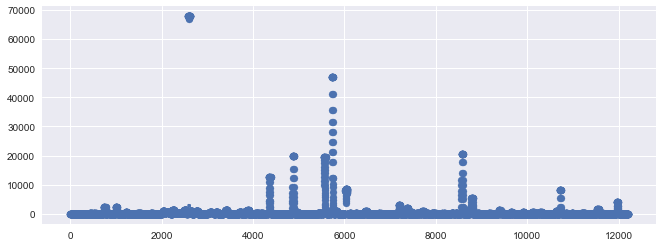

In [64]:
plt.scatter(range(len(predicted)), predicted[:,0])
plt.plot(range(len(predicted)), predicted[:,1])
plt.show()

### SVR

In [43]:
from sklearn.svm import SVR

In [44]:
pipeline = Pipeline([('scaler', StandardScaler()), ('estimator', SVR())])
pipeline.fit(train_numeric_X, train_numeric_Y.values[:,0])

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [45]:
pipeline2 = Pipeline([('scaler', StandardScaler()), ('estimator', SVR())])
pipeline2.fit(train_numeric_X, train_numeric_Y.values[:,1])

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [46]:
discovered, fatal = pipeline.predict(test_numeric_X), pipeline2.predict(test_numeric_X)

In [47]:
submission = np.vstack((test['ForecastId'], discovered, fatal)).T
submission = submission.astype(np.int32)

In [48]:
df = pd.DataFrame(data=submission, columns=['ForecastId','ConfirmedCases','Fatalities'])
df.to_csv('output/SVR_submission.csv', index=False)

### Random forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
clf = RandomForestClassifier(n_estimators=110,n_jobs=4)
clf.fit(train_numeric_X, train_numeric_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [51]:
predicted = clf.predict(test_numeric_X)
submission = np.vstack((test['ForecastId'], predicted[:,0],predicted[:,1])).T
submission = submission.astype(np.int32)
df = pd.DataFrame(data=submission, columns=['ForecastId','ConfirmedCases','Fatalities'])
df.to_csv('output/RF_submission.csv', index=False)

### Evaluation

In [52]:
train_y_pred = clf.predict(train_numeric_X)

#### Actual Value v.s. Predicted Results

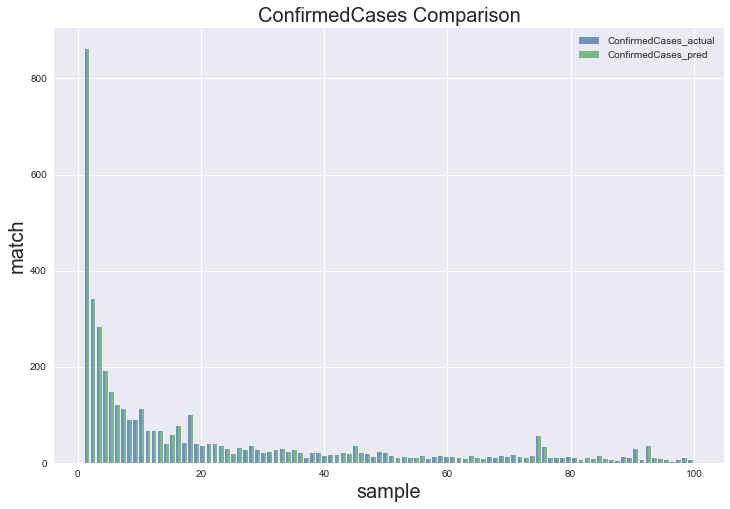

In [53]:
plt.figure(figsize=(12,8))
plt.hist([train_numeric_Y['ConfirmedCases'],train_y_pred[:,0]],bins=100, range=(1,100), label=['ConfirmedCases_actual','ConfirmedCases_pred'],alpha=0.75)
plt.title('ConfirmedCases Comparison',fontsize=20)
plt.xlabel('sample',fontsize=20)
plt.ylabel('match',fontsize=20)
plt.legend()
plt.show()

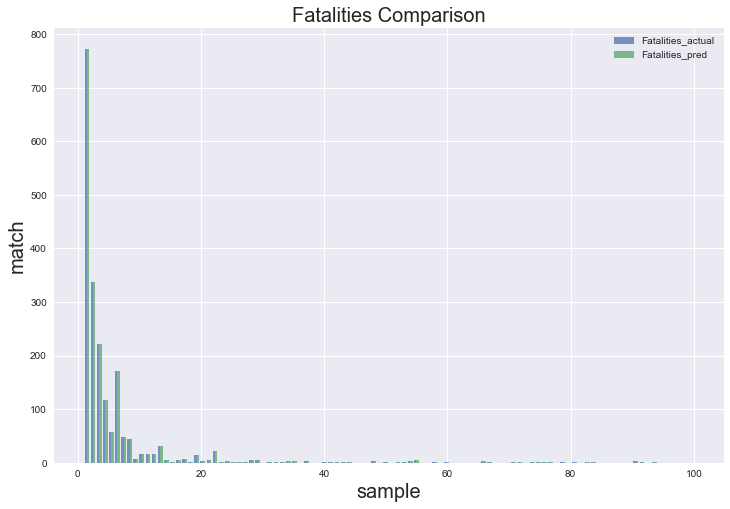

In [54]:
plt.figure(figsize=(12,8))
plt.hist([train_numeric_Y['Fatalities'],train_y_pred[:,1]],bins=100, range=(1,100), label=['Fatalities_actual','Fatalities_pred'],alpha=0.75)
plt.title('Fatalities Comparison',fontsize=20)
plt.xlabel('sample',fontsize=20)
plt.ylabel('match',fontsize=20)
plt.legend()
plt.show()

#### Root Mean Square Error

> Submissions are evaluated using the column-wise root mean squared logarithmic error.

In [55]:
error = train_y_pred - train_numeric_Y

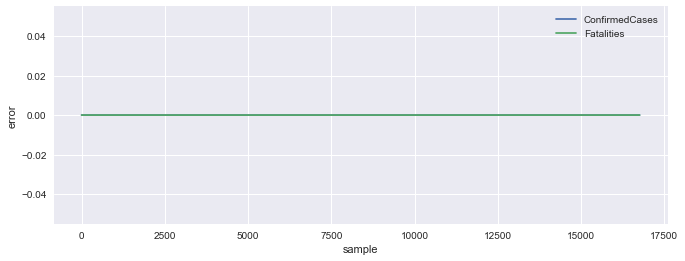

In [56]:
fig,ax = plt.subplots()
 
plt.xlabel('sample')
plt.ylabel('error')

plt.plot(range(len(error)), error['ConfirmedCases'], "x-",label="ConfirmedCases")
plt.plot(range(len(error)), error['Fatalities'], "+-", label="Fatalities")

plt.grid(True)
plt.legend()
plt.show()

In [57]:
np.sum((np.log(train_y_pred) - np.log(train_numeric_Y))**2) / len(test_numeric_X)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


ConfirmedCases    0.0
Fatalities        0.0
dtype: float64

### Correlation Visualization

#### Pearson

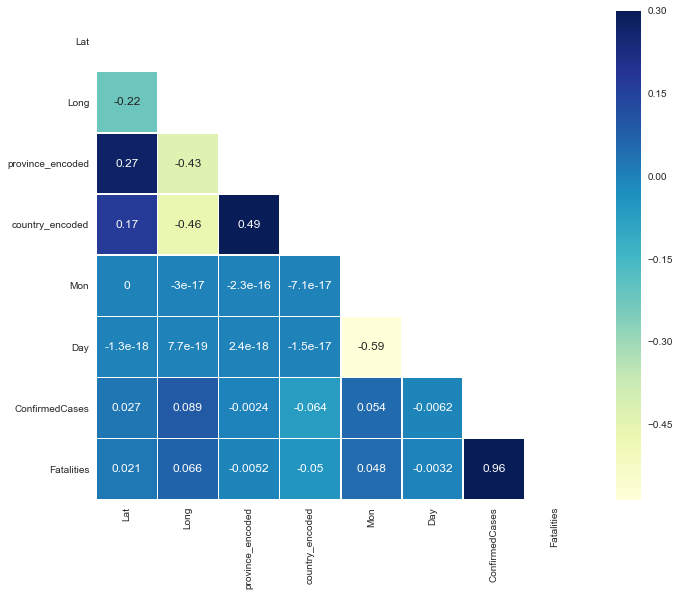

In [58]:
corr = train[numeric_features_X+numeric_features_Y].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
with sns.axes_style("white"):
    # Draw the heatmap with the mask and correct aspect ratio
    f, ax = plt.subplots(figsize=(11, 9))
    ax = sns.heatmap(corr, mask=mask,annot=True,cmap="YlGnBu",vmax=.3, square=True, linewidths=.4)
plt.show()

#### Spearman

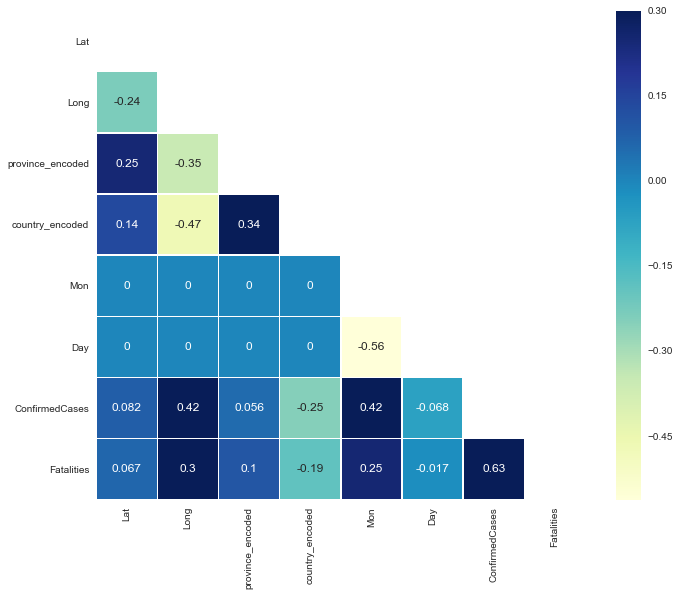

In [59]:
corr = train[numeric_features_X+numeric_features_Y].corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
with sns.axes_style("white"):
    # Draw the heatmap with the mask and correct aspect ratio
    f, ax = plt.subplots(figsize=(11, 9))
    ax = sns.heatmap(corr, mask=mask,annot=True,cmap="YlGnBu",vmax=.3, square=True, linewidths=.4)
plt.show()

#### Kendall

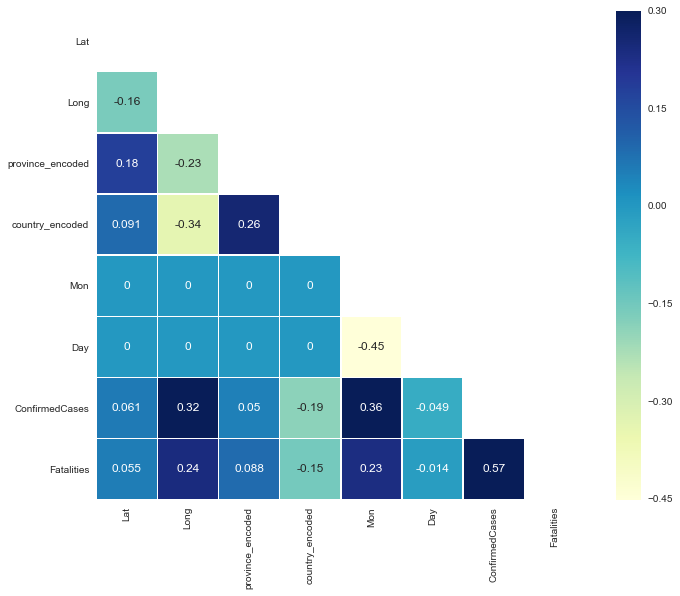

In [60]:
corr = train[numeric_features_X+numeric_features_Y].corr(method='kendall')
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
with sns.axes_style("white"):
    # Draw the heatmap with the mask and correct aspect ratio
    f, ax = plt.subplots(figsize=(11, 9))
    ax = sns.heatmap(corr, mask=mask,annot=True,cmap="YlGnBu",vmax=.3, square=True, linewidths=.4)
plt.show()

#### Weights

Parameter weights corresponding to `'Lat','Long', 'province_encoded' ,'country_encoded','Mon','Day'`

In [61]:
clf.feature_importances_

array([0.1437115 , 0.20173028, 0.11246254, 0.10627079, 0.1020084 ,
       0.3338165 ])

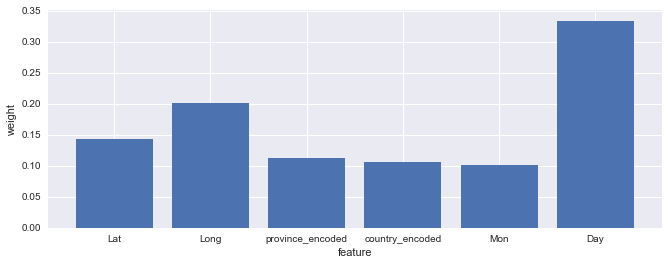

In [62]:
plt.bar(range(len(numeric_features_X)), clf.feature_importances_, tick_label=numeric_features_X)
plt.xlabel('feature')
plt.ylabel('weight')
plt.show()

#### Scatter Data points 

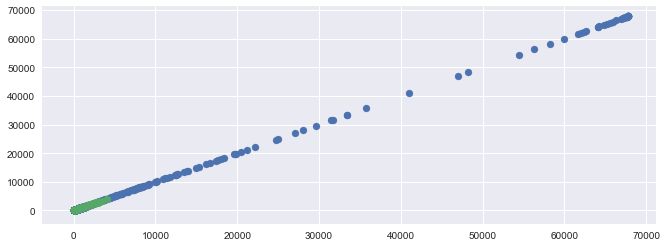

In [63]:
f,ax = plt.subplots()
ax.scatter(train_numeric_Y['ConfirmedCases'], train_y_pred[:,0])
ax.scatter(train_numeric_Y['Fatalities'], train_y_pred[:,1])

plt.show()